<a href="https://colab.research.google.com/github/RoseSarlake/spectral-image/blob/main/task5_1(specimIQ)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**readDir()** function reads the 'dir_path'and returns:
'object_raw' - object raw file path

1.   'object_raw' - object raw file path
2.   'object_hdr' - object hdr file path
3.   'white_raw'  - white raw file path
4.   'white_hdr'  - white hdr file path
5.  'dark_raw'   - dark raw file path
6.  'dark_hdr'   - dark hdr file path

**read_hdr()** reads hdr file content and returns:
1. samples
2. bands
3. lines
4. waves - and array of wavelengths from hdr file. Size of bands.

In [2]:
# read dir and search for WHITE, DARK and OBJECT (RAW and HDR)
import os
def readDir(dir_path):
    myDir = os.listdir(dir_path)
    dark_hdr =[]
    dark_raw=[]
    white_hdr=[]
    white_raw=[]
    for file in myDir:
        if 'dark' in file.lower() and 'hdr' in file.lower():
            #dark_hdr = dir_path + '/' + file
            dark_hdr = os.path.join(dir_path, file)
        if 'dark' in file.lower() and 'raw' in file.lower():
            #dark_raw = dir_path + '/' + file
            dark_raw = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'hdr' in file.lower():
            #white_hdr = dir_path + '/' + file
            white_hdr = os.path.join(dir_path, file)
        if 'white' in file.lower() and 'raw' in file.lower():
            #white_raw = dir_path + '/' + file
            white_raw = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'hdr' in file.lower():
            #object_hdr = dir_path + '/' + file
            object_hdr = os.path.join(dir_path, file)
        if (not 'white' in file.lower()) and (not 'dark' in file.lower()) and 'raw' in file.lower():
            #object_raw = dir_path + '/' + file
            object_raw = os.path.join(dir_path, file)
    return object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr  
import os
import numpy

##### Read HDR content
def read_hdr(hdr_path):
    f=open(hdr_path, "r")
    filelines = f.readlines()
    #print(filelines)
    f.close()
    bands = ''
    for fileline in filelines:
        #print(fileline)
        if 'samples' in fileline.lower():
            samples = int(fileline.replace('samples = ',''))
            print(samples)
        if bands =='' and 'bands' in fileline.lower():
            bands = int(fileline.replace('bands = ',''))
        if 'lines' in fileline.lower():
            lines = int(fileline.replace('lines = ',''))
    # read waves   
    print(samples, lines, bands)
    n = 0
    for fileline in filelines:
        if 'th = {' in fileline.lower():
          print(n)
          n1 = n+1
        n = n + 1
    n2 = n1 + bands
    print(n1)
    print(n2)
    waves = numpy.zeros(n2-n1,)
    n = 0
    for i in range(n1, n2):
        #print(filelines[i])
        waves[n] = float(filelines[i].replace(',',''))
        #print(waves[n])
        n = n + 1
    
    return samples, bands, lines, waves     




'path' is a path to 'capture' folder
the code reads 'spectral_image'

In [3]:
# Read hdr
# path = "/content/drive/MyDrive/Advanced Spectral Imaging 2021/ASI course 2021/Measurement sessions (Group1)/Group1_1/IR_sample_0056/capture"
path = "/content/drive/MyDrive/ASI/ASI course 2021/Measurement sessions (Group1)/Group1_1/174/capture"
[object_raw, object_hdr, white_raw, white_hdr, dark_raw, dark_hdr ] = readDir(path)
print(object_raw)
samples = 512 
[samples, bands, lines, waves] = read_hdr(object_hdr)

open_path = object_raw
# Read raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
spectral_image = numpy.reshape(raw_image, (lines, bands, samples))
print('spectral_image.shape: ', spectral_image.shape)

/content/drive/MyDrive/ASI/ASI course 2021/Measurement sessions (Group1)/Group1_1/174/capture/174.raw
512
512 512 204
19
20
224
spectral_image.shape:  (512, 204, 512)


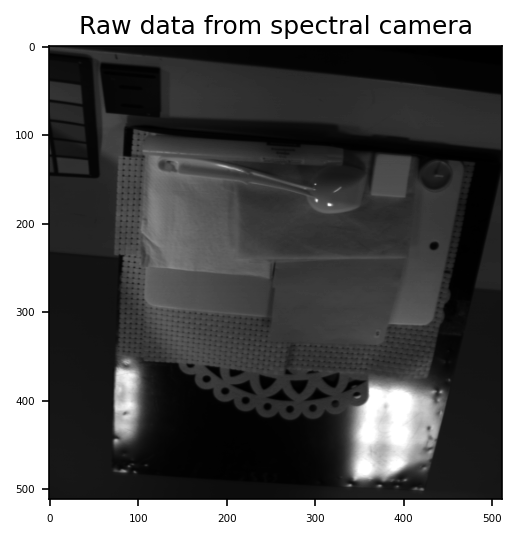

In [11]:
plt.rcParams['figure.dpi'] = 150
plt.imshow(numpy.rot90(spectral_image[:,50,:]), cmap="gray")
plt.title("Raw data from spectral camera")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()

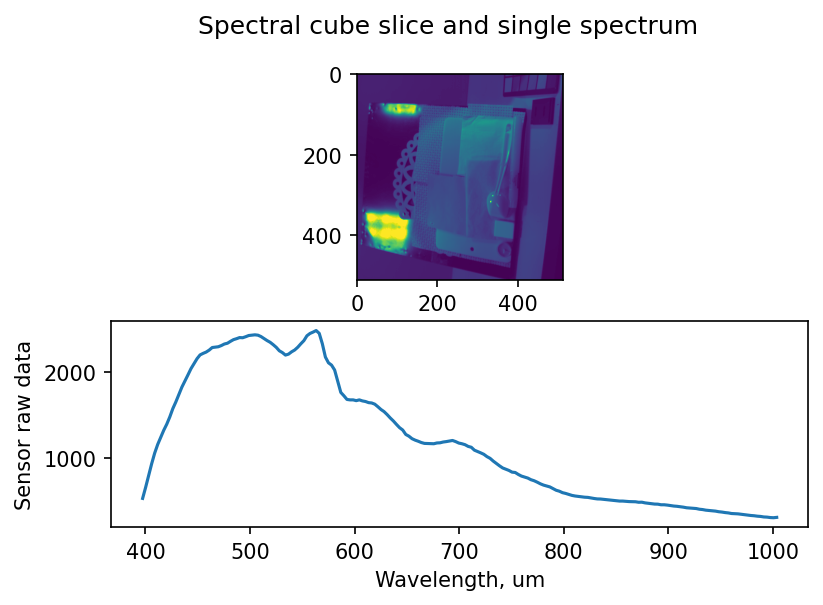

In [12]:

# Plot picture and spectrum

fig, axs = plt.subplots(2)
fig.suptitle('Spectral cube slice and single spectrum')
axs[0].imshow(spectral_image[:,53,:])#
axs[1].plot(waves, spectral_image[100,:,100])#
plt.xlabel('Wavelength, um')
plt.ylabel('Sensor raw data')
plt.rcParams['figure.dpi'] = 300
plt.show()

White correction
Read White and Dark

/content/drive/MyDrive/ASI/ASI course 2021/Measurement sessions (Group1)/Group1_1/174/capture/WHITEREF_174.hdr
512
512 1 204
28
29
233
512 204 1


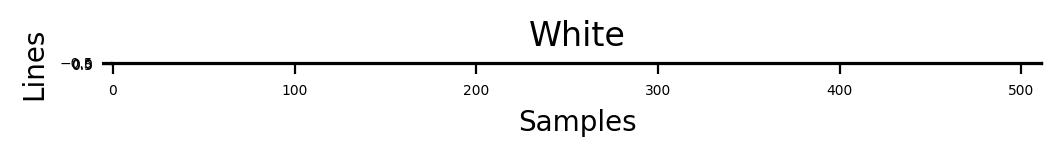

512
512 1 204
19
20
224


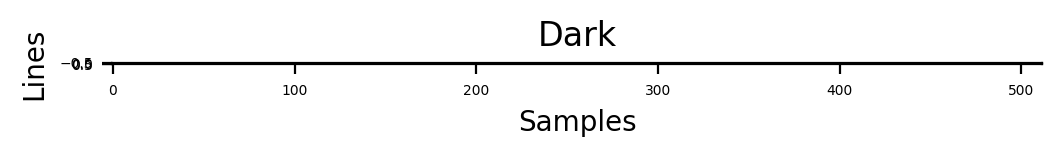

In [13]:
# Read White
print(white_hdr)
[samples, bands, lines, waves] = read_hdr(white_hdr)
print(samples, bands, lines)
open_path = white_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
white_image = numpy.reshape(raw_image, (lines, bands, samples))/lines
plt.rcParams['figure.dpi'] = 200
plt.imshow(white_image[:,53,:], cmap="gray")#
plt.title("White")
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
###############################################
# Read Dark
[samples, bands, lines, waves] = read_hdr(dark_hdr)
open_path = dark_raw
fopen = open(open_path, "rb")
raw_image = numpy.fromfile(fopen, dtype=numpy.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
dark_image = numpy.reshape(raw_image, (lines, bands, samples))/lines

plt.rcParams['figure.dpi'] = 200
plt.imshow(dark_image[:,53,:], cmap="gray")#
plt.title("Dark")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Samples')
plt.ylabel('Lines')
plt.show()


In [14]:
# Calculate average for Dark and White

# Spectral_cube = upper_part/lower_part
# upper_part = spectral_image-dark
# lower_part = white - dark

white_av = numpy.sum(white_image, axis = 0) # get average for White
#print(white_image.shape)
#print(white_av.shape)
dark_av = numpy.sum(dark_image, axis = 0) # get average for White
#print(dark_image.shape)
#print(dark_av.shape)

[lines, bansd, samples] = spectral_image.shape
print(spectral_image.shape)
upper_part = numpy.zeros((lines, bansd, samples), dtype=numpy.float32)
spectral_cube = numpy.zeros((lines, bansd, samples), dtype=numpy.float32)
# Subtract [image - dark]
for i in range(lines):
  upper_part[i,:,:] = numpy.subtract(spectral_image[i,:,:], dark_av) 
# Subtract [white - dark]
lower_part = numpy.subtract(white_av, dark_av) 
# Subtract [image - dark]
for i in range(lines):
  spectral_cube[i,:,:] = numpy.divide(upper_part[i,:,:], lower_part)
# spectral_cube[:,:,:]  a white corrected spectral cube


(512, 204, 512)


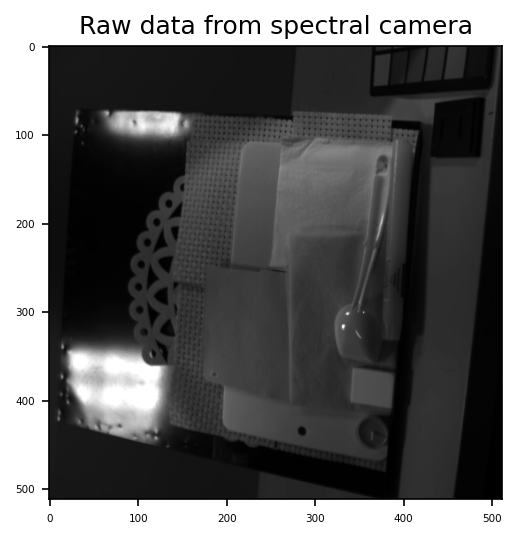

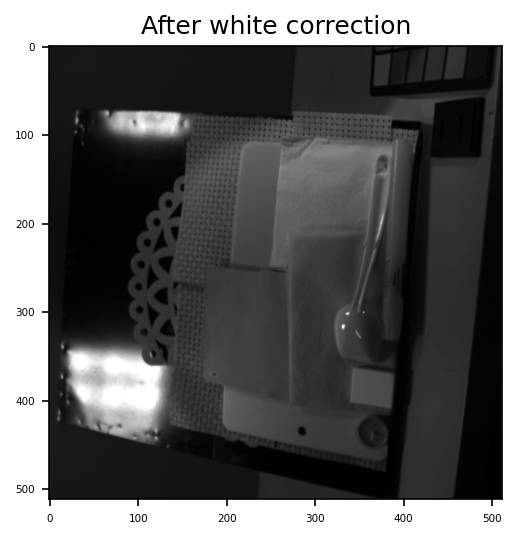

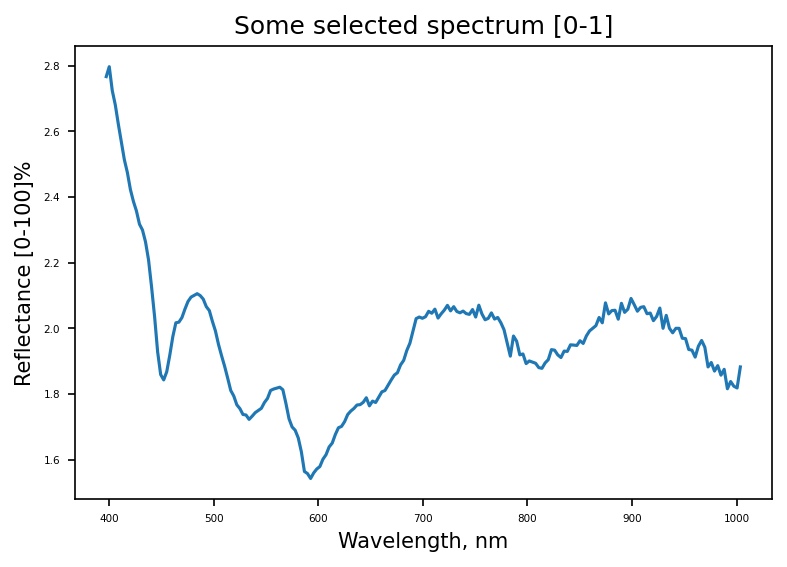

In [16]:
# Plot results before and after white correction
plt.rcParams['figure.dpi'] = 150
plt.imshow(spectral_image[:,50,:], cmap="gray")#
plt.title("Raw data from spectral camera")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.imshow(spectral_cube[:,50,:], cmap="gray")#
plt.title("After white correction")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()
plt.plot(waves, spectral_cube[100,:,100])#
plt.title("Some selected spectrum [0-1]")
plt.tick_params(axis='both', which='major', labelsize=5)
plt.xlabel('Wavelength, nm')
plt.ylabel('Reflectance [0-100]%')
plt.show()



In [19]:
for i in range(len(waves)):
  print(f"band {i} is {waves[i]} nm")

band 0 is 397.32 nm
band 1 is 400.2 nm
band 2 is 403.09 nm
band 3 is 405.97 nm
band 4 is 408.85 nm
band 5 is 411.74 nm
band 6 is 414.63 nm
band 7 is 417.52 nm
band 8 is 420.4 nm
band 9 is 423.29 nm
band 10 is 426.19 nm
band 11 is 429.08 nm
band 12 is 431.97 nm
band 13 is 434.87 nm
band 14 is 437.76 nm
band 15 is 440.66 nm
band 16 is 443.56 nm
band 17 is 446.45 nm
band 18 is 449.35 nm
band 19 is 452.25 nm
band 20 is 455.16 nm
band 21 is 458.06 nm
band 22 is 460.96 nm
band 23 is 463.87 nm
band 24 is 466.77 nm
band 25 is 469.68 nm
band 26 is 472.59 nm
band 27 is 475.5 nm
band 28 is 478.41 nm
band 29 is 481.32 nm
band 30 is 484.23 nm
band 31 is 487.14 nm
band 32 is 490.06 nm
band 33 is 492.97 nm
band 34 is 495.89 nm
band 35 is 498.8 nm
band 36 is 501.72 nm
band 37 is 504.64 nm
band 38 is 507.56 nm
band 39 is 510.48 nm
band 40 is 513.4 nm
band 41 is 516.33 nm
band 42 is 519.25 nm
band 43 is 522.18 nm
band 44 is 525.1 nm
band 45 is 528.03 nm
band 46 is 530.96 nm
band 47 is 533.89 nm
band 48 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


640.04
536.82
431.97


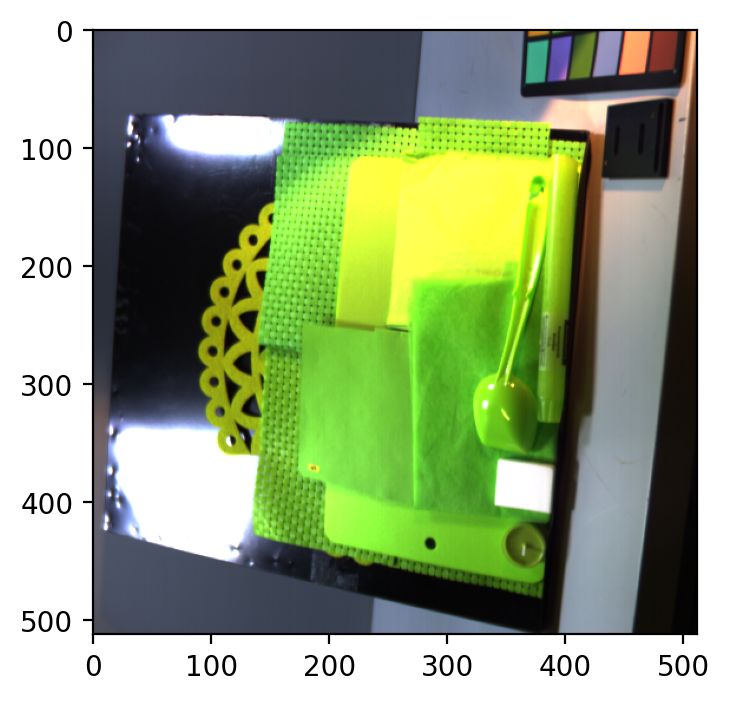

In [20]:
# Show RGB image
# plt.rcParams['figure.dpi'] = 50, make it bigger to get bigger image
RGB = numpy.empty((lines, samples, 3), dtype=numpy.float32)
ch_1 = 83
ch_2 = 48
ch_3 = 12
print(waves[ch_1])
print(waves[ch_2])
print(waves[ch_3])
#RGB[:,:,0] = spectral_image[:,ch_1,:]/numpy.amax(spectral_image[:,ch_1,:])
#RGB[:,:,1] = spectral_image[:,ch_2,:]/numpy.amax(spectral_image[:,ch_2,:])
#RGB[:,:,2] = spectral_image[:,ch_3,:]/numpy.amax(spectral_image[:,ch_3,:])
RGB[:,:,0] = spectral_cube[:,ch_1,:]
RGB[:,:,1] = spectral_cube[:,ch_2,:]
RGB[:,:,2] = spectral_cube[:,ch_3,:]
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGB)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1.7673343 1.7321585 2.299539 ]


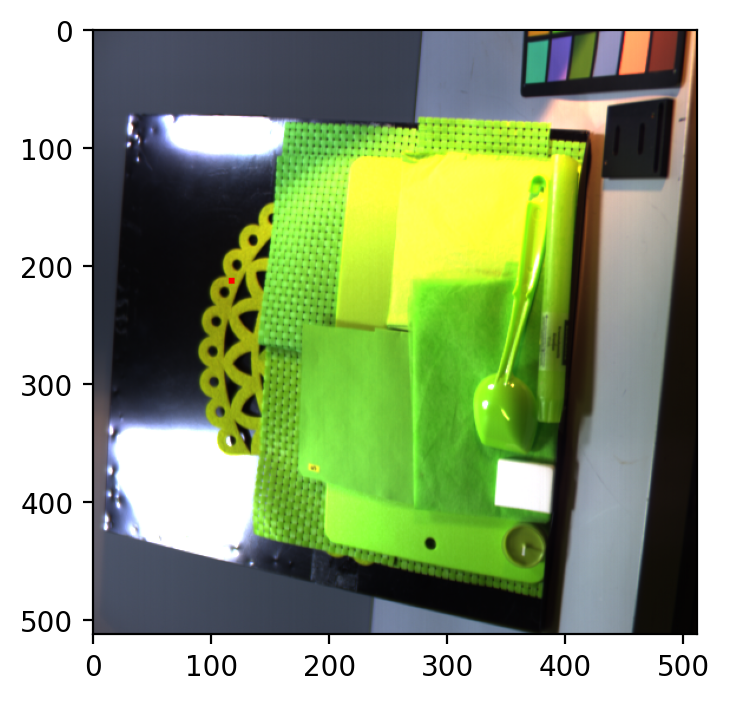

No handles with labels found to put in legend.


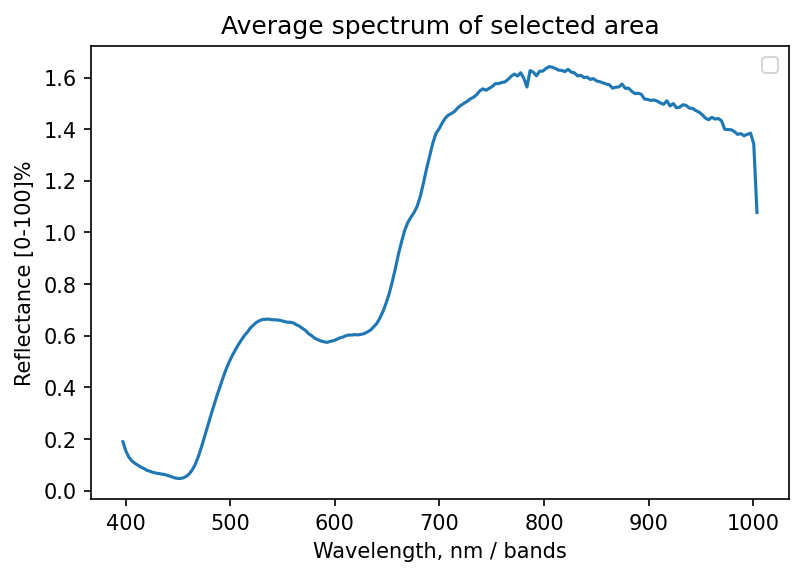

In [43]:
# Selct area and plot its avearage spectrum
print(RGB[100,100,:])
RGB2 = RGB.copy()
##################################################################
# Select plastic leaf
labels = []

x1 = 210
x2 = 215
y1 = 115
y2 = 120
RGB2[x1:x2,y1:y2,0] = 255
RGB2[x1:x2,y1:y2,1] = 0
RGB2[x1:x2,y1:y2,2] = 0
sel5 = spectral_cube[x1:x2,:,y1:y2]
sel5 = numpy.sum(sel5, axis = 0)
selection5 = numpy.sum(sel5, axis =1)/((x2-x1)*(y2-y1))
# labels.append("sample 5")
##################################################################

plt.imshow(RGB2)
plt.rcParams['figure.dpi'] = 150
plt.show()

plt.plot(waves,selection5) #label="sample 5") #plt.plot(waves,selection1)
plt.xlabel('Wavelength, nm / bands')
plt.ylabel('Reflectance [0-100]%')
plt.legend()
plt.title("Average spectrum of selected area")


plt.show()
# save 
saveraw = "/content/drive/MyDrive/ASI/Temp/IQ_green2.raw"
fileobj = open(saveraw, mode='wb')
# selection1.tofile(fileobj)
# selection2.tofile(fileobj)
# selection3.tofile(fileobj)
# selection4.tofile(fileobj)
selection5.tofile(fileobj)
fileobj.close()



In [38]:
for i in range(len(waves)):
  print(f"band {i} is {waves[i]} nm")

band 0 is 397.32 nm
band 1 is 400.2 nm
band 2 is 403.09 nm
band 3 is 405.97 nm
band 4 is 408.85 nm
band 5 is 411.74 nm
band 6 is 414.63 nm
band 7 is 417.52 nm
band 8 is 420.4 nm
band 9 is 423.29 nm
band 10 is 426.19 nm
band 11 is 429.08 nm
band 12 is 431.97 nm
band 13 is 434.87 nm
band 14 is 437.76 nm
band 15 is 440.66 nm
band 16 is 443.56 nm
band 17 is 446.45 nm
band 18 is 449.35 nm
band 19 is 452.25 nm
band 20 is 455.16 nm
band 21 is 458.06 nm
band 22 is 460.96 nm
band 23 is 463.87 nm
band 24 is 466.77 nm
band 25 is 469.68 nm
band 26 is 472.59 nm
band 27 is 475.5 nm
band 28 is 478.41 nm
band 29 is 481.32 nm
band 30 is 484.23 nm
band 31 is 487.14 nm
band 32 is 490.06 nm
band 33 is 492.97 nm
band 34 is 495.89 nm
band 35 is 498.8 nm
band 36 is 501.72 nm
band 37 is 504.64 nm
band 38 is 507.56 nm
band 39 is 510.48 nm
band 40 is 513.4 nm
band 41 is 516.33 nm
band 42 is 519.25 nm
band 43 is 522.18 nm
band 44 is 525.1 nm
band 45 is 528.03 nm
band 46 is 530.96 nm
band 47 is 533.89 nm
band 48 

(204,)
512 204 512
50
100
150
185
200
RGB:  (512, 512, 3)
cube:  (512, 204, 512)
small cube:  (512, 512, 5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8.5
4.3884444
5.376344


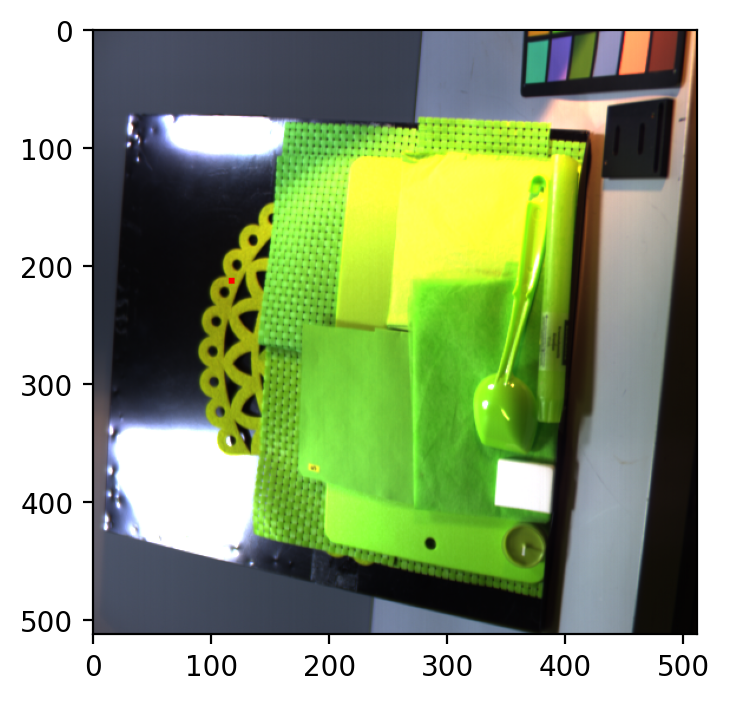

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


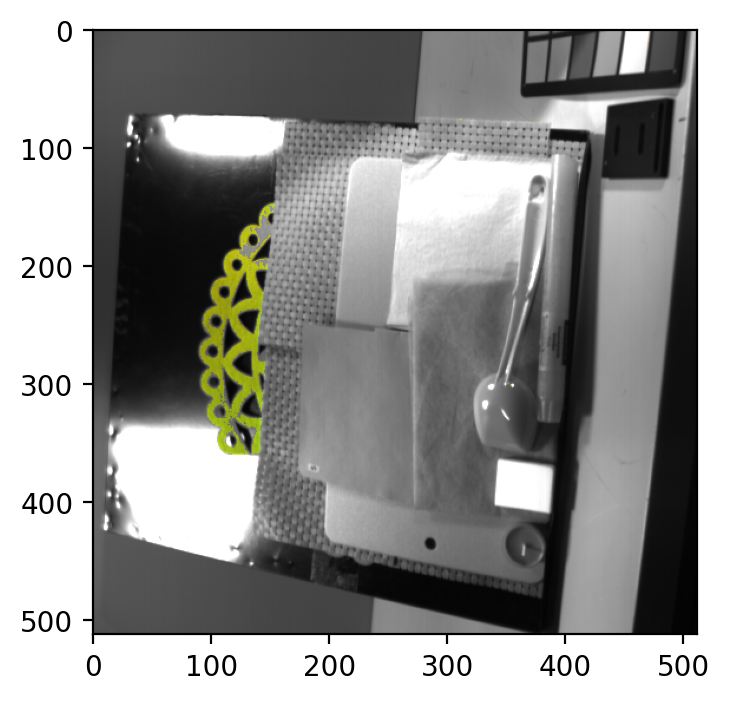

In [45]:
# Generate Band based condition
n = 5 # the number of important bnds
bbands = numpy.empty(n, dtype=numpy.uint16) # array size of number of important bands
# we select the importqant bands:
bbands[0] = 50
bbands[1] = 100
bbands[2] = 150
bbands[3] = 185
bbands[4] = 200

# Read selected spectrum, ploted and saved in prevous code section 
open_path = "/content/drive/MyDrive/ASI/Temp/IQ_green2.raw"
fopen = open(open_path, "rb")
selected = numpy.fromfile(fopen, dtype=numpy.float32)
print(selected.shape) 
fopen.close()
###################################################################################################
# ratio is an array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
ratio = numpy.zeros(n-1) # array of ratios: ratio[n]=selcted[bbands[n+1]]/selected[bbands[n]]
for i in range(n-1):
  ratio[i] = selected[bbands[i]]
###################################################################################################
# now we make a new 'small_spectral_cube' made of selected bands from 'spectral_cube'
[s1, s2, s3] = spectral_cube.shape
print(s1, s2, s3)
small_spectral_cube = numpy.empty((lines, samples, n), dtype=numpy.float32)
i=0
for band in bbands:
  small_spectral_cube[:,:,i] = spectral_cube[:,band,:]
  print(band)
  i=i+1
print('RGB: ', RGB.shape)
print('cube: ', spectral_cube.shape)
print('small cube: ', small_spectral_cube.shape)

###################################################################################################
mask = RGB.copy()

for i in range(s1):  #s1
  for j in range(s3): #s3
    criteria = 0
    for ch in range(n-1):
      #mask[i,j,0]=1
      if numpy.abs((small_spectral_cube[i,j,ch]-ratio[ch]))>0.25: #[0.0 - 0.18] threshold
        criteria = 1
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
        gray_color = (mask[i,j,0] + mask[i,j,1] + mask[i,j,2])/3 # make mask gray scale and only selection RGB
        mask[i,j,0]=gray_color
        mask[i,j,1]=gray_color
        mask[i,j,2]=gray_color                       
        # ´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
    if criteria == 0:
      pass

print(numpy.amax(small_spectral_cube))
print(numpy.amax(mask))
print(numpy.amax(RGB))
###################################################################################################
plt.rcParams['figure.dpi'] = 200
plt.imshow(RGB2)

plt.show()
plt.rcParams['figure.dpi'] = 200
plt.imshow(mask)

plt.show()

In [ ]:
print(ratio)
print(small_spectral_cube[320,256,:])
print(s1,s2,s3)

[0.71977425 0.68830049 0.55931467 0.64137048]
[0.78727454 0.79004085 0.6867059  0.75494754 0.7660311 ]
2095 256 320


Ratio

# New Section